This program will read a csv file of 311 data to a dataframe.
The dataframe will be cleaned as such: Remove all data other than the year 2017

The results will be stored to a new csv file.

In [2]:
import pandas as pd
import numpy as np
import datetime as datetime
import time
%matplotlib inline

In [3]:
# df311 = pd.read_csv('311cleaned.csv')
# dfwx = pd.read_csv('311weather.csv')
# df = pd.merge(df311, dfwx,  left_on='REQUEST_ID', right_on='REQUEST_ID', how='left')  
# saved merged data to 311Master.csv to save time loading
df = pd.read_csv('311Trimmed.csv')

In [4]:
df.describe()

,REQUEST_ID,STATUS,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,X,Y,...,daily.temperatureMin,daily.temperatureMinTime,daily.time,daily.uvIndex,daily.uvIndexTime,daily.visibility,daily.windBearing,daily.windGust,daily.windGustTime,daily.windSpeed
count,49391.000000,49391.000000,49013.000000,48970.000000,4.905500e+04,48974.000000,48970.000000,48946.000000,49391.000000,49391.000000,...,49055.000000,4.905500e+04,4.905500e+04,49055.000000,4.905500e+04,49055.000000,49055.000000,49055.000000,4.905500e+04,49055.000000
mean,163497.231439,1.211456,4.899476,16.630325,4.200323e+10,3.017581,16.630325,3.594594,-79.428335,40.165465,...,48.206375,1.497977e+09,1.497940e+09,5.261767,1.497984e+09,9.372241,216.032555,9.282200,1.497989e+09,1.536781
std,23536.455461,0.712449,2.588323,7.928818,1.811907e+05,1.432717,7.928818,1.605884,6.573827,3.324300,...,15.380325,8.201252e+06,8.201741e+06,2.416315,8.201483e+06,0.871285,73.600925,4.524205,8.203111e+06,1.162964
min,123272.000000,0.000000,1.000000,0.000000,4.200301e+10,0.000000,0.000000,1.000000,-80.088105,0.000000,...,1.200000,1.483276e+09,1.483247e+09,1.000000,1.483290e+09,3.780000,0.000000,1.460000,1.483247e+09,0.020000
25%,143202.500000,1.000000,3.000000,11.000000,4.200311e+10,2.000000,11.000000,2.000000,-80.007489,40.420436,...,37.170000,1.491361e+09,1.491278e+09,3.000000,1.491322e+09,9.050000,188.000000,5.730000,1.491332e+09,0.710000
50%,163258.000000,1.000000,5.000000,16.000000,4.200318e+10,3.000000,16.000000,4.000000,-79.976893,40.445355,...,51.120000,1.497928e+09,1.497845e+09,5.000000,1.497895e+09,9.750000,224.000000,8.810000,1.497902e+09,1.310000
75%,183529.500000,1.000000,7.000000,22.000000,4.200329e+10,5.000000,22.000000,5.000000,-79.934224,40.462244,...,60.880000,1.504091e+09,1.504066e+09,7.000000,1.504109e+09,10.000000,267.000000,11.620000,1.504112e+09,2.110000
max,205290.000000,3.000000,9.000000,32.000000,4.200398e+10,6.000000,32.000000,6.000000,0.000000,40.520177,...,73.950000,1.514722e+09,1.514696e+09,10.000000,1.514732e+09,10.000000,359.000000,26.100000,1.514696e+09,6.150000


In [5]:
df.head()

,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,...,daily.temperatureMin,daily.temperatureMinTime,daily.time,daily.uvIndex,daily.uvIndexTime,daily.visibility,daily.windBearing,daily.windGust,daily.windGustTime,daily.windSpeed
0,205290,2017-12-31T23:17:00,Snow/Ice removal,Website,1,DPW - Street Maintenance,Marshall-Shadeland,1.0,27.0,4.200327e+10,...,1.99,1.514722e+09,1.514696e+09,1.0,1.514732e+09,9.09,264.0,5.32,1.514696e+09,0.57
1,205289,2017-12-31T22:01:00,Snow/Ice removal,Report2Gov iOS,1,DPW - Street Maintenance,Stanton Heights,9.0,10.0,4.200310e+10,...,1.57,1.514722e+09,1.514696e+09,1.0,1.514732e+09,9.06,265.0,5.27,1.514696e+09,0.51
2,205288,2017-12-31T21:55:00,Snow/Ice removal,Website,1,DPW - Street Maintenance,New Homestead,5.0,31.0,4.200331e+10,...,1.76,1.514722e+09,1.514696e+09,1.0,1.514732e+09,9.06,257.0,5.38,1.514696e+09,0.63
3,205287,2017-12-31T18:23:00,Missed Pick Up,Website,1,DPW - Refuse,Mount Washington,2.0,19.0,4.200319e+10,...,1.50,1.514722e+09,1.514696e+09,1.0,1.514732e+09,9.09,262.0,5.35,1.514696e+09,0.55
4,205286,2017-12-31T17:56:00,Snow/Ice removal,Report2Gov iOS,1,DPW - Street Maintenance,Stanton Heights,9.0,10.0,4.200310e+10,...,1.57,1.514722e+09,1.514696e+09,1.0,1.514732e+09,9.06,265.0,5.27,1.514696e+09,0.52


In [6]:
df.columns

Index(['REQUEST_ID', 'CREATED_ON', 'REQUEST_TYPE', 'REQUEST_ORIGIN', 'STATUS',
       'DEPARTMENT', 'NEIGHBORHOOD', 'COUNCIL_DISTRICT', 'WARD', 'TRACT',
       'PUBLIC_WORKS_DIVISION', 'PLI_DIVISION', 'POLICE_ZONE', 'FIRE_ZONE',
       'X', 'Y', 'GEO_ACCURACY', 'current.apparentTemperature',
       'current.cloudCover', 'current.dewPoint', 'current.humidity',
       'current.icon', 'current.precipIntensity', 'current.precipProbability',
       'current.precipType', 'current.pressure', 'current.summary',
       'current.temperature', 'current.time', 'current.uvIndex',
       'current.visibility', 'current.windBearing', 'current.windGust',
       'current.windSpeed', 'daily.apparentTemperatureHigh',
       'daily.apparentTemperatureHighTime', 'daily.apparentTemperatureLow',
       'daily.apparentTemperatureLowTime', 'daily.apparentTemperatureMax',
       'daily.apparentTemperatureMaxTime', 'daily.apparentTemperatureMin',
       'daily.apparentTemperatureMinTime', 'daily.cloudCover',
    

In [7]:
df['REQUEST_TYPE'].value_counts(sort=True, ascending=False, dropna=False) 

Potholes                                8787
Weeds/Debris                            7933
Building Maintenance                    4037
Abandoned Vehicle (parked on street)    2572
Litter                                  1916
Refuse Violations                       1802
Illegal Parking                         1770
Missed Pick Up                          1717
Replace/Repair a Sign                   1554
City Source (CDBG)                      1499
Street Light - Repair                   1458
Building Without a Permit               1348
Vacant Building                         1264
Paving Request                          1260
Overgrowth                              1211
Snow/Ice removal                        1050
Pruning (city tree)                     1032
Rodent control                           965
Need Potable Water                       845
Fire Safety System Not Working           818
Dead Animal                              797
Request New Sign                         785
Illegal Du

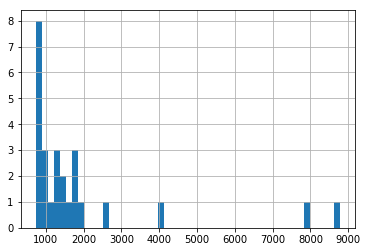

In [8]:
df['REQUEST_TYPE'].value_counts(sort=True, ascending=False, dropna=False).hist(bins=50)

In [9]:
df['REQUEST_TYPE'].value_counts(sort=True, ascending=False, dropna=False) 

Potholes                                8787
Weeds/Debris                            7933
Building Maintenance                    4037
Abandoned Vehicle (parked on street)    2572
Litter                                  1916
Refuse Violations                       1802
Illegal Parking                         1770
Missed Pick Up                          1717
Replace/Repair a Sign                   1554
City Source (CDBG)                      1499
Street Light - Repair                   1458
Building Without a Permit               1348
Vacant Building                         1264
Paving Request                          1260
Overgrowth                              1211
Snow/Ice removal                        1050
Pruning (city tree)                     1032
Rodent control                           965
Need Potable Water                       845
Fire Safety System Not Working           818
Dead Animal                              797
Request New Sign                         785
Illegal Du

In [10]:
df.describe()

,REQUEST_ID,STATUS,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,X,Y,...,daily.temperatureMin,daily.temperatureMinTime,daily.time,daily.uvIndex,daily.uvIndexTime,daily.visibility,daily.windBearing,daily.windGust,daily.windGustTime,daily.windSpeed
count,49391.000000,49391.000000,49013.000000,48970.000000,4.905500e+04,48974.000000,48970.000000,48946.000000,49391.000000,49391.000000,...,49055.000000,4.905500e+04,4.905500e+04,49055.000000,4.905500e+04,49055.000000,49055.000000,49055.000000,4.905500e+04,49055.000000
mean,163497.231439,1.211456,4.899476,16.630325,4.200323e+10,3.017581,16.630325,3.594594,-79.428335,40.165465,...,48.206375,1.497977e+09,1.497940e+09,5.261767,1.497984e+09,9.372241,216.032555,9.282200,1.497989e+09,1.536781
std,23536.455461,0.712449,2.588323,7.928818,1.811907e+05,1.432717,7.928818,1.605884,6.573827,3.324300,...,15.380325,8.201252e+06,8.201741e+06,2.416315,8.201483e+06,0.871285,73.600925,4.524205,8.203111e+06,1.162964
min,123272.000000,0.000000,1.000000,0.000000,4.200301e+10,0.000000,0.000000,1.000000,-80.088105,0.000000,...,1.200000,1.483276e+09,1.483247e+09,1.000000,1.483290e+09,3.780000,0.000000,1.460000,1.483247e+09,0.020000
25%,143202.500000,1.000000,3.000000,11.000000,4.200311e+10,2.000000,11.000000,2.000000,-80.007489,40.420436,...,37.170000,1.491361e+09,1.491278e+09,3.000000,1.491322e+09,9.050000,188.000000,5.730000,1.491332e+09,0.710000
50%,163258.000000,1.000000,5.000000,16.000000,4.200318e+10,3.000000,16.000000,4.000000,-79.976893,40.445355,...,51.120000,1.497928e+09,1.497845e+09,5.000000,1.497895e+09,9.750000,224.000000,8.810000,1.497902e+09,1.310000
75%,183529.500000,1.000000,7.000000,22.000000,4.200329e+10,5.000000,22.000000,5.000000,-79.934224,40.462244,...,60.880000,1.504091e+09,1.504066e+09,7.000000,1.504109e+09,10.000000,267.000000,11.620000,1.504112e+09,2.110000
max,205290.000000,3.000000,9.000000,32.000000,4.200398e+10,6.000000,32.000000,6.000000,0.000000,40.520177,...,73.950000,1.514722e+09,1.514696e+09,10.000000,1.514732e+09,10.000000,359.000000,26.100000,1.514696e+09,6.150000


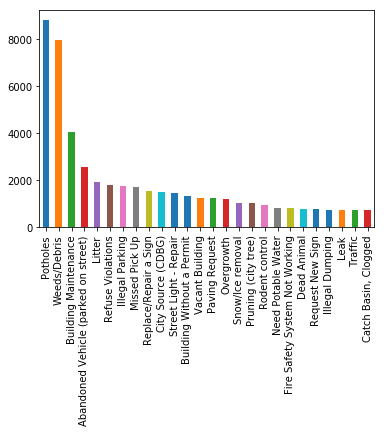

In [11]:
df['REQUEST_TYPE'].value_counts(sort=True, ascending=False, dropna=False).plot.bar()

In [12]:
df['REQUEST_ORIGIN'].value_counts(sort=True, ascending=False, dropna=False)

Call Center           31468
Website                8012
Control Panel          6541
Report2Gov iOS         1448
Twitter                1073
Report2Gov Android      444
Text Message            392
Report2Gov Website        6
QAlert Mobile iOS         5
Email                     2
Name: REQUEST_ORIGIN, dtype: int64

In [13]:
# df['CREATED_ON'].value_counts(sort=True, ascending=False, dropna=False)

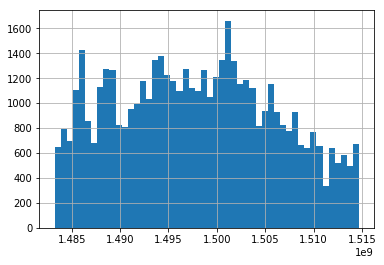

In [14]:
# visualizatins of various fields and weather events
df['daily.time'].hist(bins=50)

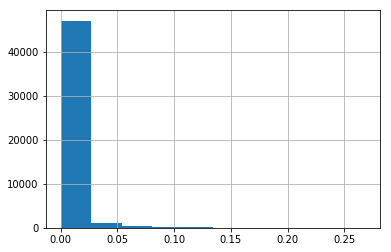

In [15]:
df['current.precipIntensity'].hist()

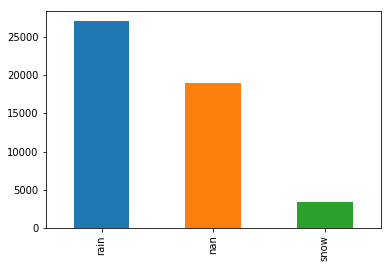

In [16]:
df['daily.precipType'].value_counts(sort=True, ascending=False, dropna=False).plot.bar()

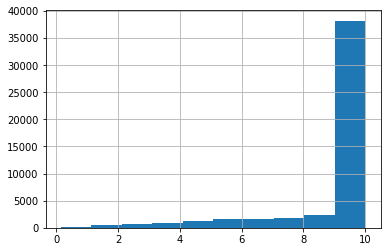

In [17]:
df['current.visibility'].hist(bins=10)

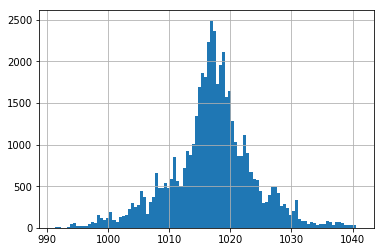

In [18]:
df['current.pressure'].hist(bins=100)

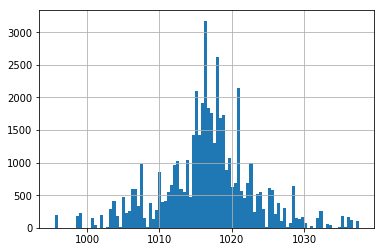

In [19]:
df['daily.pressure'].hist(bins=100)

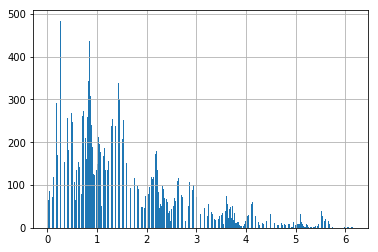

In [20]:
df['daily.windSpeed'].hist(bins=1000)

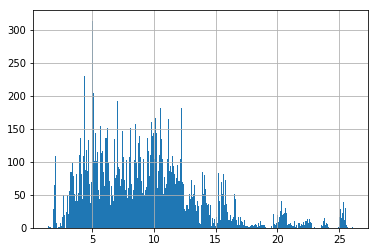

In [21]:
df['daily.windGust'].hist(bins=1000)

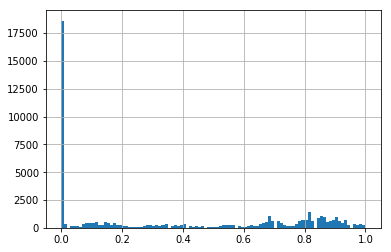

In [22]:
df['daily.precipProbability'].hist(bins=100)

In [23]:
df['current.summary'].value_counts(sort=True, ascending=False, dropna=False)

Clear                      16082
Overcast                   10435
Mostly Cloudy               8859
Partly Cloudy               6939
Light Rain                  2429
Drizzle                     2266
Rain                         635
Flurries                     546
Foggy                        487
NaN                          336
Light Snow                   129
Humid and Mostly Cloudy       87
Humid and Partly Cloudy       62
Humid and Overcast            52
Light Sleet                   30
Humid                         11
Snow                           5
Heavy Rain                     1
Name: current.summary, dtype: int64

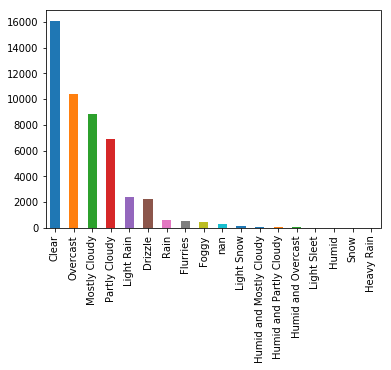

In [24]:
df['current.summary'].value_counts(sort=True, ascending=False, dropna=False).plot.bar()

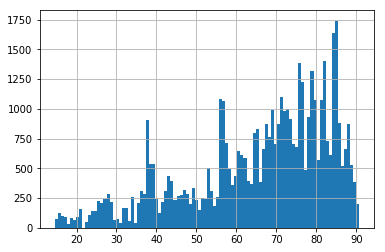

In [25]:
df['daily.temperatureHigh'].hist(bins=100)

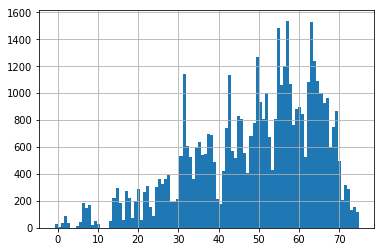

In [26]:
df['daily.temperatureLow'].hist(bins=100)

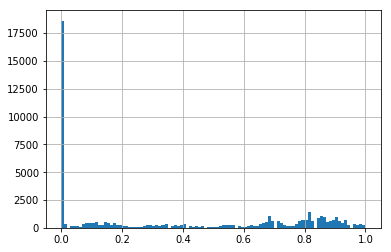

In [27]:
df['daily.precipProbability'].hist(bins=100)

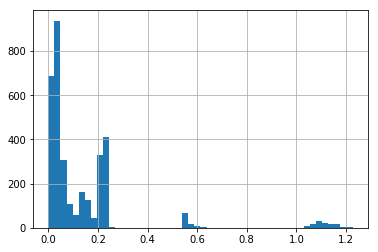

In [28]:
df['daily.precipAccumulation'].hist(bins=50)

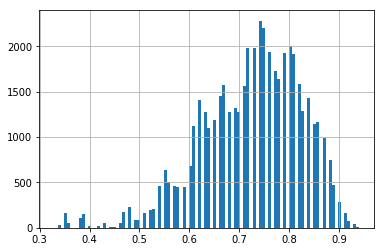

In [29]:
df['daily.humidity'].hist(bins=100)

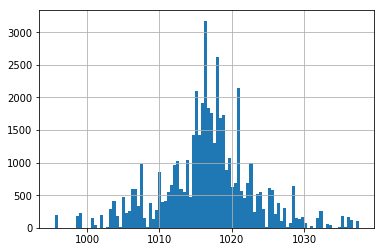

In [30]:
df['daily.pressure'].hist(bins=100)

In [31]:
df['REQUEST_TYPE'].value_counts(sort=True, ascending=False, dropna=False) 

Potholes                                8787
Weeds/Debris                            7933
Building Maintenance                    4037
Abandoned Vehicle (parked on street)    2572
Litter                                  1916
Refuse Violations                       1802
Illegal Parking                         1770
Missed Pick Up                          1717
Replace/Repair a Sign                   1554
City Source (CDBG)                      1499
Street Light - Repair                   1458
Building Without a Permit               1348
Vacant Building                         1264
Paving Request                          1260
Overgrowth                              1211
Snow/Ice removal                        1050
Pruning (city tree)                     1032
Rodent control                           965
Need Potable Water                       845
Fire Safety System Not Working           818
Dead Animal                              797
Request New Sign                         785
Illegal Du

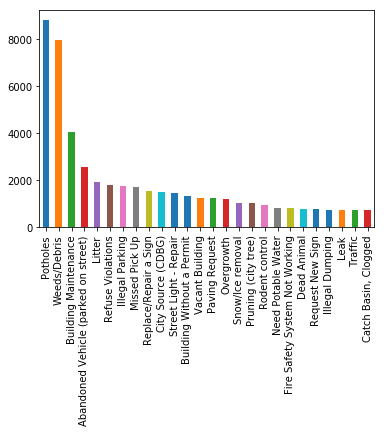

In [32]:
df['REQUEST_TYPE'].value_counts(sort=True, ascending=False, dropna=False).plot.bar()

In [33]:
df['REQUEST_TYPE'].value_counts(sort=True, ascending=False, dropna=False)

Potholes                                8787
Weeds/Debris                            7933
Building Maintenance                    4037
Abandoned Vehicle (parked on street)    2572
Litter                                  1916
Refuse Violations                       1802
Illegal Parking                         1770
Missed Pick Up                          1717
Replace/Repair a Sign                   1554
City Source (CDBG)                      1499
Street Light - Repair                   1458
Building Without a Permit               1348
Vacant Building                         1264
Paving Request                          1260
Overgrowth                              1211
Snow/Ice removal                        1050
Pruning (city tree)                     1032
Rodent control                           965
Need Potable Water                       845
Fire Safety System Not Working           818
Dead Animal                              797
Request New Sign                         785
Illegal Du

In [34]:
df_roads = df[df['REQUEST_TYPE'] == 'Potholes']
df_roads = df_roads.append(df[df['REQUEST_TYPE'] == 'Paving Request'])
df_roads = df_roads.append(df[df['REQUEST_TYPE'] == 'Request New Sign'])
df_roads = df_roads.append(df[df['REQUEST_TYPE'] == 'Street Light - Repair'])
df_roads = df_roads.append(df[df['REQUEST_TYPE'] == 'Replace/Repair a Sign'])


df_parkingTowing = df[df['REQUEST_TYPE'] == 'Abandoned Vehicle (parked on street)']
df_parkingTowing = df_parkingTowing.append(df[df['REQUEST_TYPE'] == 'Illegal Parking'])

df_trashPublicWorks = df[df['REQUEST_TYPE'] == 'Refuse Violations']
df_trashPublicWorks = df_trashPublicWorks.append(df[df['REQUEST_TYPE'] == 'Illegal Dumping'])
df_trashPublicWorks = df_trashPublicWorks.append(df[df['REQUEST_TYPE'] == 'Missed Pick Up'])
df_trashPublicWorks = df_trashPublicWorks.append(df[df['REQUEST_TYPE'] == 'Snow/Ice removal'])
df_trashPublicWorks = df_trashPublicWorks.append(df[df['REQUEST_TYPE'] == 'Need Potable Water'])

df_animalControl = df[df['REQUEST_TYPE'] == 'Rodent control']
df_animalControl = df_animalControl.append(df[df['REQUEST_TYPE'] == 'Dead Animal'])

df_police = df[df['REQUEST_TYPE'] == 'Traffic']

df_property = df[df['REQUEST_TYPE'] == 'Building Maintenance']
df_property = df_property.append(df[df['REQUEST_TYPE'] == 'City Source (CDBG)'])
df_property = df_property.append(df[df['REQUEST_TYPE'] == 'Vacant Building'])
df_property = df_property.append(df[df['REQUEST_TYPE'] == 'Fire Safety System Not Working'])
df_property = df_property.append(df[df['REQUEST_TYPE'] == 'Leak'])

df_treesLandscaping = df[df['REQUEST_TYPE'] == 'Weed/Debris']
df_treesLandscaping = df_treesLandscaping.append(df[df['REQUEST_TYPE'] == 'Overgrowth'])
df_treesLandscaping = df_treesLandscaping.append(df[df['REQUEST_TYPE'] == 'Pruning (city tree)'])

#df_new = df_roads.append(df_property,df_police,df_trashPublicWorks,df_parkingTowin)

In [38]:
df_new = df_roads.append(df_property)
df_new = df_new.append(df_treesLandscaping)
df_new = df_new.append(df_police)
df_new = df_new.append(df_animalControl)
df_new = df_new.append(df_trashPublicWorks)
df_new = df_new.append(df_parkingTowing)

In [39]:
df_new

,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,...,daily.temperatureMin,daily.temperatureMinTime,daily.time,daily.uvIndex,daily.uvIndexTime,daily.visibility,daily.windBearing,daily.windGust,daily.windGustTime,daily.windSpeed
13,205276,2017-12-31T13:42:00,Potholes,Website,1,DPW - Street Maintenance,Beechview,4.0,19.0,4.200319e+10,...,1.27,1.514722e+09,1.514696e+09,1.0,1.514732e+09,9.10,261.0,5.37,1.514696e+09,0.56
79,205180,2017-12-29T17:45:00,Potholes,Website,1,DPW - Street Maintenance,Manchester,6.0,21.0,4.200321e+10,...,11.94,1.514542e+09,1.514524e+09,1.0,1.514560e+09,8.58,253.0,8.96,1.514578e+09,1.31
100,205151,2017-12-29T14:58:00,Potholes,Call Center,1,DPW - Street Maintenance,Regent Square,9.0,14.0,4.200314e+10,...,11.47,1.514542e+09,1.514524e+09,1.0,1.514560e+09,8.28,252.0,8.98,1.514578e+09,1.26
116,205130,2017-12-29T14:03:00,Potholes,Call Center,1,DPW - Street Maintenance,Brookline,4.0,19.0,4.200319e+10,...,10.95,1.514542e+09,1.514524e+09,1.0,1.514560e+09,8.59,253.0,9.22,1.514578e+09,1.30
137,205098,2017-12-29T12:40:00,Potholes,Call Center,1,DPW - Street Maintenance,Lincoln Place,5.0,31.0,4.200331e+10,...,10.75,1.514542e+09,1.514524e+09,1.0,1.514560e+09,8.32,252.0,9.37,1.514578e+09,1.29
144,205087,2017-12-29T12:06:00,Potholes,Call Center,1,DPW - Street Maintenance,Duquesne Heights,2.0,19.0,4.200319e+10,...,11.21,1.514542e+09,1.514524e+09,1.0,1.514560e+09,8.61,253.0,9.06,1.514578e+09,1.32
155,205074,2017-12-29T11:13:00,Potholes,Website,1,DPW - Street Maintenance,Brookline,4.0,19.0,4.200319e+10,...,10.71,1.514542e+09,1.514524e+09,1.0,1.514560e+09,8.60,253.0,9.30,1.514578e+09,1.29
175,205044,2017-12-29T09:11:00,Potholes,Call Center,1,DPW - Street Maintenance,Spring Garden,1.0,26.0,4.200324e+10,...,11.15,1.514542e+09,1.514524e+09,1.0,1.514560e+09,8.54,253.0,8.86,1.514578e+09,1.27
189,205018,2017-12-28T19:38:00,Potholes,Website,1,DPW - Street Maintenance,Banksville,2.0,20.0,4.200320e+10,...,1.41,1.514466e+09,1.514437e+09,1.0,1.514473e+09,9.99,282.0,2.91,1.514484e+09,0.11
198,205005,2017-12-28T15:42:00,Potholes,Call Center,1,DPW - Street Maintenance,Squirrel Hill South,5.0,14.0,4.200314e+10,...,1.69,1.514466e+09,1.514437e+09,1.0,1.514473e+09,9.99,280.0,3.18,1.514484e+09,0.13


In [53]:
df_weeds.describe()

,REQUEST_ID,STATUS,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,X,Y,...,daily.temperatureMin,daily.temperatureMinTime,daily.time,daily.uvIndex,daily.uvIndexTime,daily.visibility,daily.windBearing,daily.windGust,daily.windGustTime,daily.windSpeed
count,7933.000000,7933.000000,7863.000000,7865.000000,7.873000e+03,7865.000000,7865.000000,7863.000000,7933.000000,7933.000000,...,7873.000000,7.873000e+03,7.873000e+03,7873.000000,7.873000e+03,7873.000000,7873.000000,7873.000000,7.873000e+03,7873.000000
mean,168818.156687,1.535233,4.456187,17.934139,4.200325e+10,3.177368,17.934139,3.674425,-79.374754,40.131107,...,54.602416,1.499727e+09,1.499692e+09,6.142004,1.499737e+09,9.422660,214.841484,8.210879,1.499743e+09,1.172688
std,18228.364581,0.890175,2.490446,7.774985,1.682691e+05,1.421727,7.774985,1.637706,6.929864,3.503698,...,12.346300,6.179228e+06,6.178942e+06,2.178028,6.178338e+06,0.796446,75.836305,3.912323,6.179492e+06,0.899118
min,123313.000000,0.000000,1.000000,0.000000,4.200301e+10,0.000000,0.000000,1.000000,-80.084271,0.000000,...,2.370000,1.483427e+09,1.483420e+09,1.000000,1.483456e+09,5.710000,0.000000,1.530000,1.483502e+09,0.020000
25%,156020.000000,1.000000,3.000000,13.000000,4.200313e+10,2.000000,13.000000,3.000000,-80.013338,40.416356,...,48.440000,1.495616e+09,1.495598e+09,5.000000,1.495642e+09,9.160000,187.000000,5.120000,1.495660e+09,0.480000
50%,169844.000000,1.000000,4.000000,18.000000,4.200319e+10,3.000000,18.000000,3.000000,-79.983266,40.438633,...,57.960000,1.500008e+09,1.500005e+09,6.000000,1.500052e+09,9.790000,223.000000,7.620000,1.500059e+09,0.990000
75%,182380.000000,3.000000,6.000000,25.000000,4.200330e+10,5.000000,25.000000,5.000000,-79.945497,40.459101,...,63.730000,1.503659e+09,1.503634e+09,8.000000,1.503673e+09,9.990000,259.000000,10.480000,1.503695e+09,1.500000
max,205176.000000,3.000000,9.000000,32.000000,4.200398e+10,6.000000,32.000000,6.000000,0.000000,40.520177,...,73.950000,1.514542e+09,1.514524e+09,10.000000,1.514560e+09,10.000000,359.000000,25.680000,1.514578e+09,5.650000
